# Generating Obsplans Automatically

In progress

## Step 1: Generate Airmass Grid

Note that the airmass values depend on temperature, pressure, and humidity at CTIO. The default location uses fiducial values of relative humidity = 0.5, temperature = 5 degrees Celsius, and pressure = 780 mbar, but these values should be updated and airmass grid recalculated at different times of the year.

In [2]:
from decat_obsplan_generator import AirmassCalculator

ac = AirmassCalculator()
ac.generate_airmass_grid()

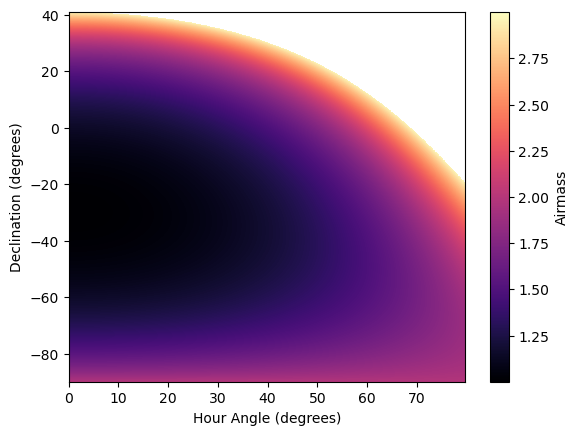

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# plot 2d airmass grid
airmass_grid = ac.load_airmass_grid()
airmass_grid.loc[airmass_grid.airmass > 3.0, "airmass"] = np.nan
pivot_table = airmass_grid.pivot(index="dec", columns="ha", values="airmass")
x_min, x_max = airmass_grid["ha"].min(), airmass_grid["ha"].max()
y_min, y_max = airmass_grid["dec"].min(), airmass_grid["dec"].max()

plt.imshow(
    pivot_table, cmap="magma", origin="lower", aspect="auto", extent=(x_min, x_max + 1, y_min, y_max + 1)
)
plt.colorbar(label="Airmass")  # Optional: Add a colorbar
plt.xlabel("Hour Angle (degrees)")
plt.ylabel("Declination (degrees)")
plt.show()

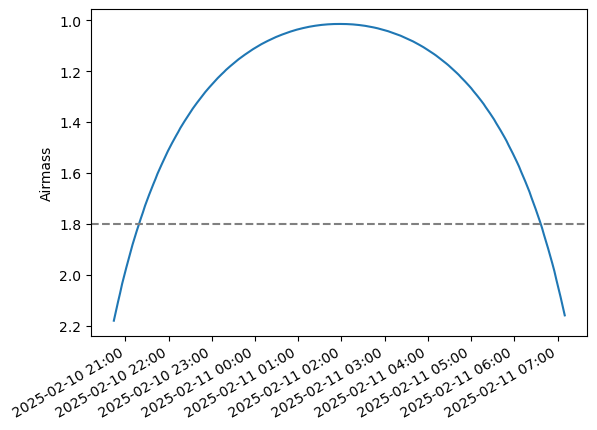

In [4]:
# generate airmass plot for random RA/dec
import astropy.units as u

fig, ax = plt.subplots()
ra_test = 100.0 * u.deg
dec_test = -40 * u.deg
ac.plot_airmass(fig, ax, ra_test, dec_test)
plt.show()

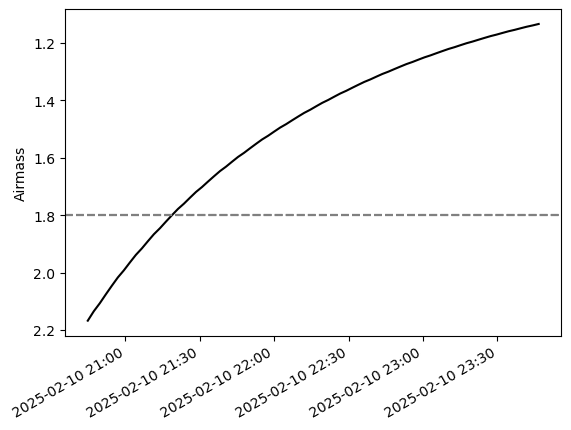

In [5]:
# case 2: specific time ranges
from astropy.time import Time

fig, ax = plt.subplots()
ra_test = 100.0 * u.deg
dec_test = -40 * u.deg

times1 = Time.now() + np.linspace(0, 4.0, num=100) * u.hour
times2 = Time.now() + np.linspace(4.0, 8.0, num=100) * u.hour
times3 = Time.now() + np.linspace(-4.0, 0.0, num=100) * u.hour

ac.plot_airmass(fig, ax, ra_test, dec_test, times=times1, color="blue")
ac.plot_airmass(fig, ax, ra_test, dec_test, times=times2, color="black")
ac.plot_airmass(fig, ax, ra_test, dec_test, times=times3, color="red")
plt.show()

## Step 2: Parse jsons + scheduling context

In [6]:
from decat_obsplan_generator.helpers import read_json

test_fn = "../../data/jsons/etale.g.32min.json"
read_json(test_fn)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/jsons/etale.g.32min.json'

## Step 3: Determining beginning and end of night, and target observation blocks.

We check that for a given night, the beginning and end of the night is accurately determined. Then, for each target, we establish the earliest and latest times observing can happen.

In [ ]:
from decat_obsplan_generator.helpers import calc_night_limits

calc_night_limits()

                                           json program        propid  prio       dur         ra        dec secz18_beg secz18_end secz2_beg secz2_end order t_start  t_end slew_s  secz_i  secz_f
name                                                                                                                                                                                             
296.A.a                                     296     YSE  2024B-763968     0   6.7 min   18.1 deg  -17.4 deg      21:45      21:53     21:45     22:10     0   21:45  21:52      0    1.72    1.79
SN-X1                                      X123     AGN  2024A-755342     0  14.7 min   35.5 deg   -5.3 deg      21:45      22:35     21:45     22:53     1   21:52  22:08     74    1.48    1.57
SN-X1_                                X123_moon     AGN  2024A-755342     0  11.2 min   35.5 deg   -5.3 deg      21:45      22:35     21:45     22:53     2   22:08  22:19     29    1.57    1.66
SN-S1                         

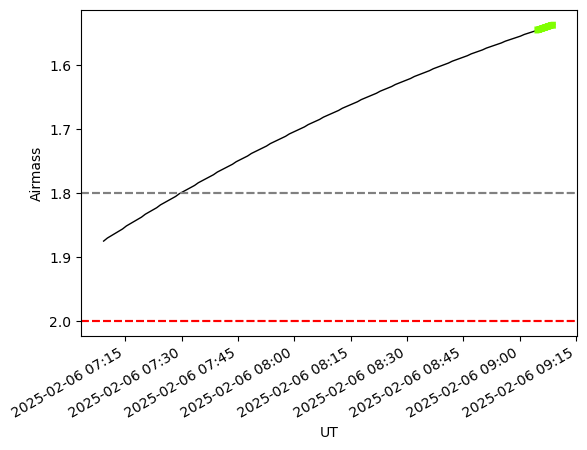

In [2]:
from decat_obsplan_generator.scheduling import generate_nightly_schedule
import warnings

warnings.filterwarnings("ignore")

schedule = generate_nightly_schedule("../../decat_pointings/json_files/2025A", "250205")
schedule.generate_optimal_schedule()
schedule.display()

"""
schedule.move_target("S-CVZ", 5)
#schedule.display()
schedule.swap_targets("SN-C3", "S-CVZ")
#schedule.display()
schedule.remove_target("2025zi")
#schedule.display()
schedule.add_target("2025zi")
#schedule.display()
"""
schedule.display_airmass_plot("2025aft")
